<a href="https://colab.research.google.com/github/cmd0850/Chislovy_metodi/blob/main/%D0%94%D0%B6%D0%B5%D0%BD%D1%87%D0%B0%D0%BA%D0%BE_%D0%9B%D0%90%D0%9113_%D0%B2%D0%B0%D1%8010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13.

#Метод Ейлера

x = [2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1] 
y = [2.5    2.7829 3.0697 3.3599 3.6528 3.948  4.2452 4.5438 4.8438 5.1448
 5.4468]


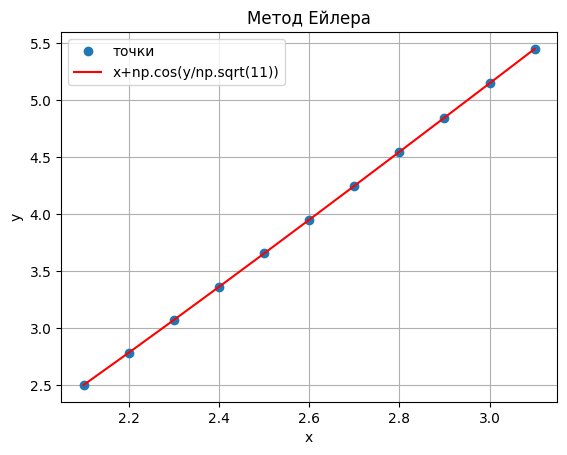

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x+np.cos(y/np.sqrt(11))

# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a, b, h, y0 = 2.1, 3.1, 0.1, 2.5

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

n = int((b - a) / h) # кількість кроків

x = np.array([a + i*h for i in range(n + 1)]) # задаємо x генератором списків

y = np.empty(n + 1)
y[0] = y0

for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

y_rounded = np.round(y, 4)
print("x =", x, "\ny =", y_rounded)

plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера")
plt.legend(["точки", "x+np.cos(y/np.sqrt(11))"])
plt.grid()
plt.show()

In [ ]:
#Додати перевірку odeint для першого завдання


x= [2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1]
y= [2.5        2.78489058 3.07334798 3.3648168  3.65879334 3.95483363
 4.25256005 4.55166591 4.85191876 5.15316225 5.45531666]


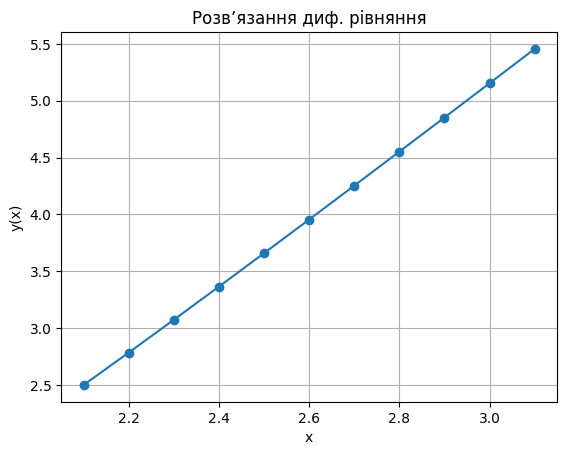

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x+np.cos(y/np.sqrt(11))

# Початкова умова
y0 = 2.5
a, b, h= 2.1, 3.1, 0.1
# Значення x
#x = np.array([i * 0.2 for i in range(0, 6)]) стара версія
n = int((b - a) / h) # кількість кроків
x = np.array([a + i*h for i in range(n + 1)])

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


In [ ]:
#додати перевірку solve_ivp для перешого завдання

x= [2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1]
y= [2.5        2.78489052 3.07335824 3.36483936 3.65881826 3.95485106
 4.25256571 4.55166191 4.8519112  5.15315685 5.45531397]


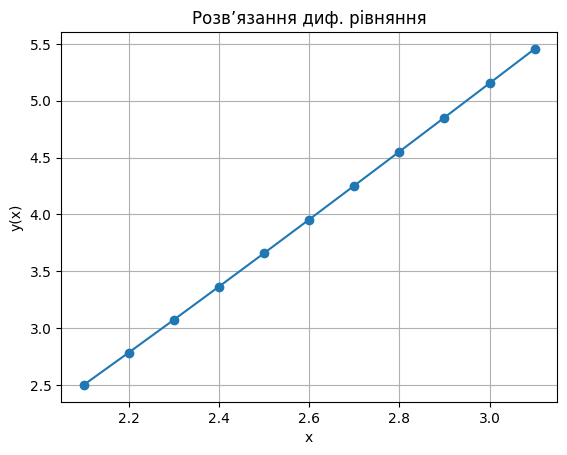

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x+np.cos(y/np.sqrt(11))

# Початкова умова
y0 = [2.5]  # Потрібно передати як список
a, b, h = 2.1, 3.1, 0.1
# Значення x
n = int((b - a) / h) # кількість кроків
x = np.array([a + i*h for i in range(n + 1)])

# Розв'язання ODE
sol = solve_ivp(model, [a, b], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#Метод Ейлера-Коші

x = [1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4] 
y = [2.5    2.7269 2.9683 3.224  3.4933 3.7754 4.0694 4.3743 4.6887 5.0112
 5.3406]


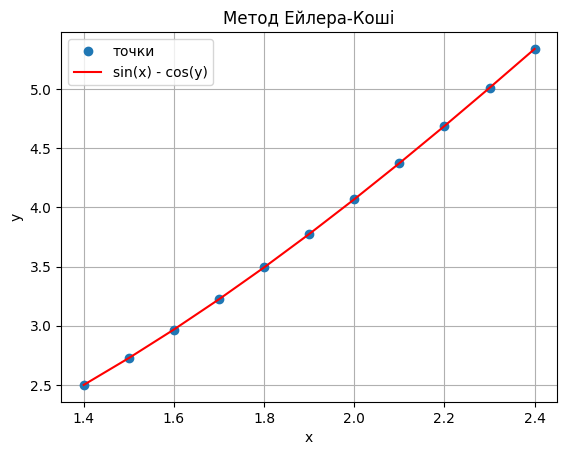

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x+np.sin(y/np.e)

a = 1.4  # ліва межа відрізку
b = 2.4  # права межа відрізку
h = 0.1  # крок
y0 = 2.5  # початкова умова
n = int((b - a) / h)  # кількість кроків

# Генерація x, враховуючи останнє значення
x = np.arange(a, b + h, h)  # Задати x з включенням b

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    # Використовується середнє значення для нахилу
    y[i + 1] = y[i] + (f(x[i], y[i]) + f(x[i + 1], y[i] + h * f(x[i], y[i]))) * h / 2

y_rounded = np.round(y, 4)

print("x =", x, "\ny =", y_rounded)

# Візуалізація
plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші")
plt.legend(["точки", "x+np.sin(y/np.e)"])
plt.grid()
plt.show()


#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x= [1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4]
y= [2.5        2.7269521  2.96852537 3.22429997 3.49368596 3.77591678
 4.07005089 4.37498288 4.68946466 5.01213724 5.3415705 ]


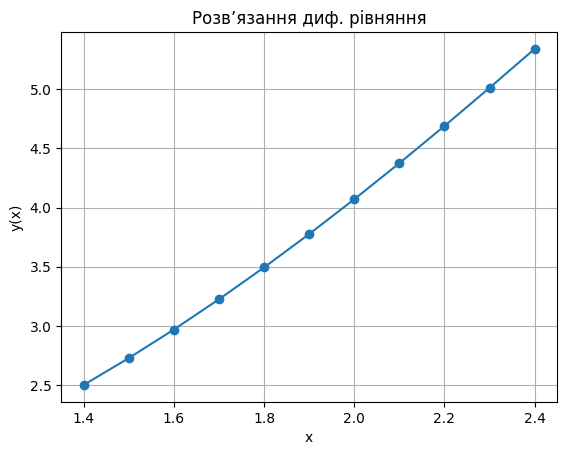

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x+np.sin(y/np.e)

# Початкова умова
y0 = 2.5
a, b, h= 1.4, 2.4, 0.1
# Значення x
#x = np.array([i * 0.2 for i in range(0, 6)]) стара версія
n = int((b - a) / h) # кількість кроків
x = np.array([a + i*h for i in range(n + 1)])

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x= [1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4]
y= [2.5        2.72695214 2.96855447 3.22437351 3.49377068 3.77596501
 4.07003315 4.37490941 4.6893857  5.01211157 5.34159424]


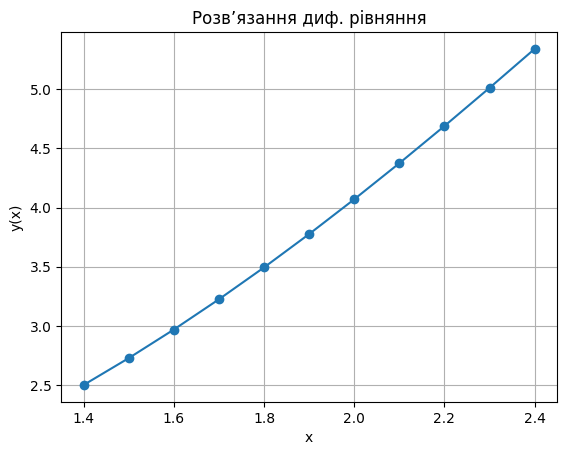

In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x+np.sin(y/np.e)

# Початкова умова
y0 = [2.5]  # Потрібно передати як список
a, b, h = 1.4, 2.4, 0.1
# Значення x
n = int((b - a) / h) # кількість кроків
x = np.array([a + i*h for i in range(n + 1)])

# Розв'язання ODE
sol = solve_ivp(model, [a, b], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()
